In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier  # Import XGBoost classifier
from sklearn.metrics import accuracy_score

In [98]:
# Define a dictionary to map genre names to numerical labels
genre_label_mapping = {
    'blues': 0,
    'classical': 1,
    'country': 2,
    'disco': 3,
    'hiphop': 4,
    'jazz': 5,
    'metal': 6,
    'pop': 7,
    'reggae': 8,
    'rock': 9
}

In [99]:
# Step 1: Read the train.csv and test.csv files
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


In [100]:
# Step 2: Data Preprocessing
# Replace genre names in the "label" column of the train_data DataFrame with numerical labels
train_data['label'] = train_data['label'].map(genre_label_mapping)


In [101]:

# Extract features and labels from the train_data DataFrame
X = train_data.drop(["filename", "label"], axis=1)  # Remove non-feature columns
y = train_data["label"]  # Extract the labels

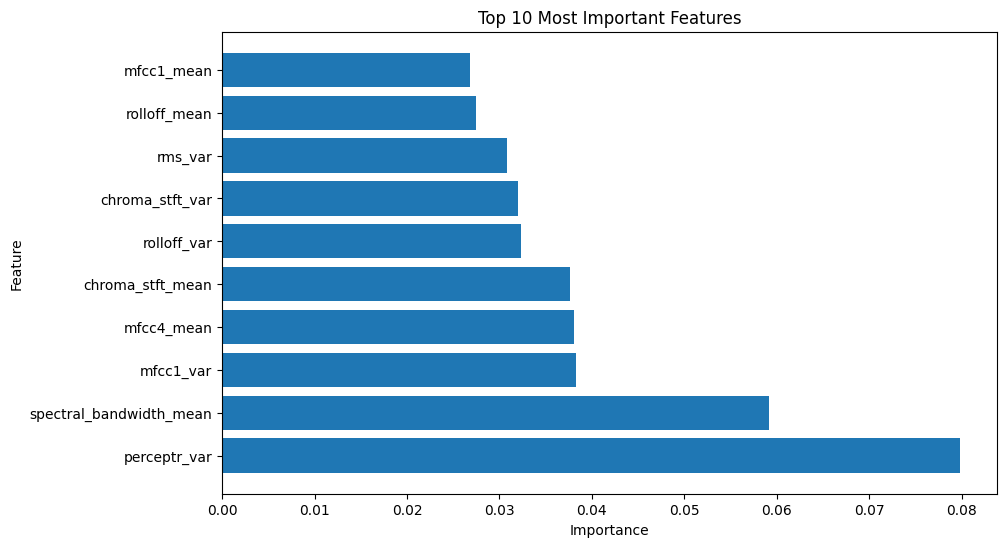

In [102]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importance = xgb_classifier.feature_importances_

# Create a dataframe with features and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize the top N most important features
top_n = 10  # Define the number of top features to visualize
top_features = feature_importance_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.show()


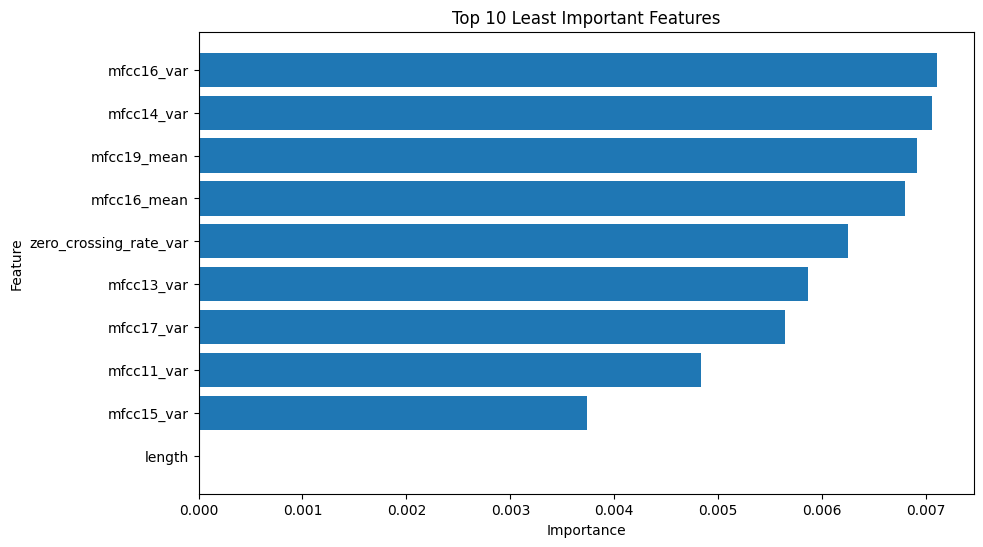

In [103]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importance = xgb_classifier.feature_importances_

# Create a dataframe with features and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Visualize the bottom N least important features
bottom_n = 10  # Define the number of bottom features to visualize
bottom_features = feature_importance_df.head(bottom_n)

plt.figure(figsize=(10, 6))
plt.barh(bottom_features['Feature'], bottom_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Least Important Features')
plt.show()


In [104]:
# Replace this line with the extraction of feature importances and selecting the least important features
# Example:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Get the names of the 10 least important features
least_important_features = feature_importance_df.head(57)['Feature'].tolist()

# Drop the least important features from the original dataset
X_dropped = X.drop(least_important_features, axis=1)

# Split the modified dataset into training and validation sets
X_train_dropped, X_val_dropped, y_train_dropped, y_val_dropped = train_test_split(X_dropped, y, test_size=0.2, random_state=42)

# Standardize the modified features
scaler_dropped = StandardScaler()
X_train_dropped = scaler_dropped.fit_transform(X_train_dropped)
X_val_dropped = scaler_dropped.transform(X_val_dropped)


In [105]:

# # Split the training data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the features (mean = 0, standard deviation = 1)
# scaler = StandardScaler()
# X_train_ = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)

In [106]:

# Step 3: Model Training using XGBoost Classifier
# Create and train an XGBoost classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train_dropped, y_train_dropped)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [107]:
# Step 4: Make Predictions
# Use the trained model to make predictions on the validation set
y_pred = xgb_classifier.predict(X_val_dropped)

In [108]:
# Step 5: Evaluate the Model
# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_pred)
print("Validation Set Accuracy:", accuracy)

Validation Set Accuracy: 0.2818232351306281


In [109]:

# Step 6: Model Inference
# Apply the trained model to the test data to make predictions
X_test = test_data.drop(["id"], axis=1)  # Remove non-feature columns
X_test = scaler.transform(X_test)  # Standardize the test data
test_predictions = xgb_classifier.predict(X_test)

ValueError: Feature shape mismatch, expected: 1, got 58

In [ ]:
# Step 7: Create a Submission File
submission_df = pd.DataFrame({"id": test_data["id"], "label": test_predictions})
submission_df.to_csv("xgboost_submission.csv", index=False)